In [6]:
import pymatgen
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import*
from math import *
import numpy as np
from matplotlib import pyplot as plt
with MPRester("mDfThPfTExFojai5") as m: 
    
    bandstructure = m.get_bandstructure_by_material_id("mp-754824")
    """
    Mon materiau etait initialement le mp-22526 (LiCoO2) mais celui-ci
    ne comporte pas de structure de bande sur materialsproject. 
    Apres discussion avec Mr Rignanese, il me propose de le faire avec mp-754824 (SrO)
    """
    bg=bandstructure.get_band_gap()
    e_fermi= bandstructure.efermi
    cbm=bandstructure.get_cbm()
    vbm=bandstructure.get_vbm()
    energy_cbm=cbm.get('energy')
    energy_vbm=vbm.get('energy')
    print('La bande interdite est',bg)
    print('La bande interdite est-elle directe?',bg.get('direct'))
    print('L energie de fermi vaut',e_fermi,'eV et le gap entre les deux bandes vaut',bg.get('energy'),'eV')
    print('La bande interdite se situe entre',e_fermi+energy_vbm, 'et',e_fermi+energy_cbm,'eV')

La bande interdite est {'direct': True, 'energy': 2.5643000000000002, 'transition': '\\Gamma-\\Gamma'}
La bande interdite est-elle directe? True
L energie de fermi vaut 0.72525495 eV et le gap entre les deux bandes vaut 2.5643000000000002 eV
La bande interdite se situe entre 1.39525495 et 3.9595549500000002 eV


Passons a la dispersion des bandes. On considere que la dispersion correspond a la pente de l energie (en prenant ses extremites) 
La dispersion maximale de la derniere bande de valence est: 1.7379388877043433
Elle se situe entre la branche $\Gamma$ et A
Et la dispersion minimale est: 0.04668532549702624
Et se situe entre la branche L et H
 
La dispersion maximale de la premiere bande de conduction est: 2.7929622277330615
Elle se situe entre la branche $\Gamma$ et A
Et la dispersion minimale est: 0.06961667084278504
Et se situe entre la branche H et A$\mid$L
Les fleches vertes representent la dispersion minimal et les fleches rouges la dispersion maximal des deux bandes


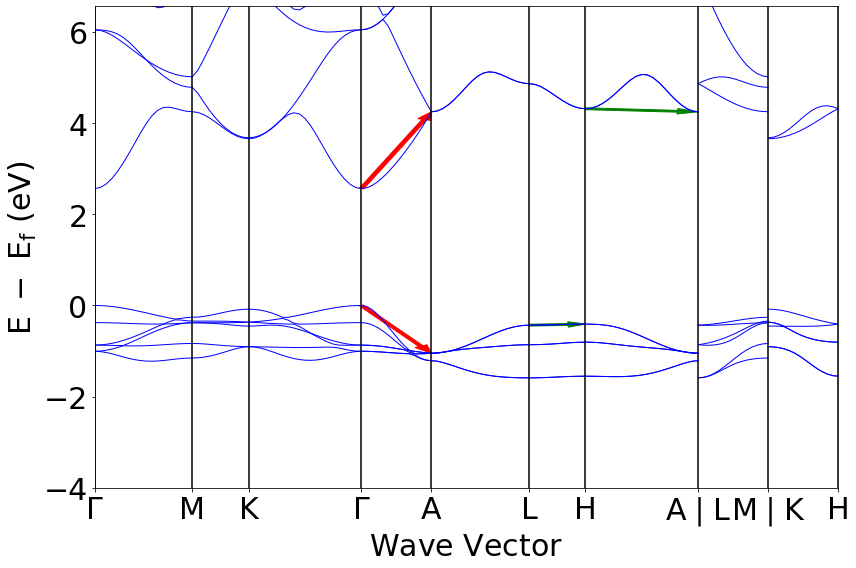

In [7]:
print('Passons a la dispersion des bandes. On considere que la dispersion correspond a la pente de l energie (en prenant ses extremites) ')
#print(cbm)
#couchelim_vbm=vbm.get('band_index') # reste a trouver comment recuperer le [15]
#couchelim_cbm=cbm.get('band_index') 
couchelim_vbm=15
couchelim_cbm=16#plus ou moins au centre


energy=BSPlotter(bandstructure).bs_plot_data().get('energy')
distance=BSPlotter(bandstructure).get_ticks().get('distance')
#pour enlever les doublons
new_dist = [] 
for i in distance : 
    if i not in new_dist: 
        new_dist.append(i)
#Preparation de variables necessaires au calcul de la pente
longueur=len(energy)
dx_energy=np.zeros(longueur)
dy_energy=np.zeros(longueur)
x=np.zeros(longueur)
y=np.zeros(longueur)
d_distance=np.zeros(longueur)
pente_x=np.zeros(longueur)
pente_y=np.zeros(longueur)
for i in range (longueur):
    x=energy[i].get('1')[couchelim_vbm]
    y=energy[i].get('1')[couchelim_cbm]
    dx_energy[i]=x[-1]-x[0]
    dy_energy[i]=y[-1]-y[0]
    d_distance[i]=new_dist[i+1]-new_dist[i]
    pente_x[i]=dx_energy[i]/d_distance[i]
    pente_y[i]=dy_energy[i]/d_distance[i]

#Determination de la pente max/min
index_max_x=0
index_min_x=0
max_x=0
min_x=100

index_max_y=0
index_min_y=0
max_y=0
min_y=100
for j in range(longueur):
    if abs(pente_x[j])>max_x:
        max_x=abs(pente_x[j])
        index_max_x=j
    if abs(pente_x[j])<min_x:
        min_x=abs(pente_x[j])
        index_min_x=j
    if abs(pente_y[j])>max_y:
        max_y=abs(pente_y[j])
        index_max_y=j
    if abs(pente_y[j])<min_y:
        min_y=abs(pente_y[j])
        index_min_y=j

print('La dispersion maximale de la derniere bande de valence est:',max_x)
print('Elle se situe entre la branche',BSPlotter(bandstructure).get_ticks().get('label')[(index_max_x)*2],'et', BSPlotter(bandstructure).get_ticks().get('label')[(index_max_x+1)*2])
print('Et la dispersion minimale est:',min_x)
print('Et se situe entre la branche',BSPlotter(bandstructure).get_ticks().get('label')[(index_min_x)*2],'et', BSPlotter(bandstructure).get_ticks().get('label')[(index_min_x+1)*2])
print(' ')
print('La dispersion maximale de la premiere bande de conduction est:',max_y)
print('Elle se situe entre la branche',BSPlotter(bandstructure).get_ticks().get('label')[(index_max_y)*2],'et', BSPlotter(bandstructure).get_ticks().get('label')[(index_max_y+1)*2])
print('Et la dispersion minimale est:',min_y)
print('Et se situe entre la branche',BSPlotter(bandstructure).get_ticks().get('label')[(index_min_y)*2],'et', BSPlotter(bandstructure).get_ticks().get('label')[(index_min_y)*2+1])

print('Les fleches vertes representent la dispersion minimal et les fleches rouges la dispersion maximal des deux bandes')
BSPlotter(bandstructure).get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.arrow(new_dist[index_max_x],energy[index_max_x].get('1')[couchelim_vbm][0],d_distance[index_max_x],dx_energy[index_max_x], color='r',width= 0.04,length_includes_head= True)
plt.arrow(new_dist[index_min_x],energy[index_min_x].get('1')[couchelim_vbm][0],d_distance[index_min_x],dx_energy[index_min_x], color='g',width= 0.04,length_includes_head= True,head_length=0.15)
plt.arrow(new_dist[index_max_y],energy[index_max_y].get('1')[couchelim_cbm][0],d_distance[index_max_y],dy_energy[index_max_y], color='r',width= 0.04,length_includes_head= True)
plt.arrow(new_dist[index_min_y],energy[index_min_y].get('1')[couchelim_cbm][0],d_distance[index_min_y],dy_energy[index_min_y], color='g',width= 0.04,length_includes_head= True)
plt.show()



In [8]:
print('Finalisons avec la masse effective')
print('La masse effective se definit comme: m*=h_bar**2/[(de)**2/(dk)**2')
#coord du max
en_vbm=energy[index_max_x].get('1')[couchelim_vbm]
dist_vbm=new_dist[index_max_x]


dp=np.linspace(new_dist[index_max_x],new_dist[index_max_x+1],len(en_vbm))
dn=np.linspace(new_dist[index_max_x],new_dist[index_max_x-1],len(en_vbm))

pp=[dp[5],en_vbm[5]] #point par lequel la parabole doit passer

a=(pp[1]-en_vbm[0])/(pp[0]-dist_vbm)**2

print('Equation de la forme y= a x**2 +b x+c, et la derivee seconde vaut 2a et donc 2a=(de)**2/(dk)')
h_bar= 1.054571818*10**(-34)
eV2J=1.60218*10**(-19)
me=h_bar**2/(2*a*eV2J*10**-20)
print('La masse effictive des eletrons de la bande de valence est de', me,'en kg')





Finalisons avec la masse effective
La masse effective se definit comme: m*=h_bar**2/[(de)**2/(dk)**2
Equation de la forme y= a x**2 +b x+c, et la derivee seconde vaut 2a et donc 2a=(de)**2/(dk)
La masse effictive des eletrons de la bande de valence est de -3.9949825781749145e-31 en kg


In [9]:
#coord du min
en_cbm=energy[index_min_y].get('1')[couchelim_cbm]
dist_cbm=new_dist[index_min_y]


dp=np.linspace(new_dist[index_max_y],new_dist[index_max_y+1],len(en_cbm))
dn=np.linspace(new_dist[index_max_y],new_dist[index_max_y-1],len(en_cbm))

pp=[dp[5],en_vbm[5]] #point par lequel la parabole doit passer

abis=(pp[1]-en_cbm[0])/(pp[0]-dist_cbm)**2
mebis=h_bar**2/(2*abis*eV2J*10**-20)
print('La masse effictive des eletrons de la bande de conduction est de', mebis,'en kg')

La masse effictive des eletrons de la bande de conduction est de -2.3004814240007157e-30 en kg
